## 1. Data

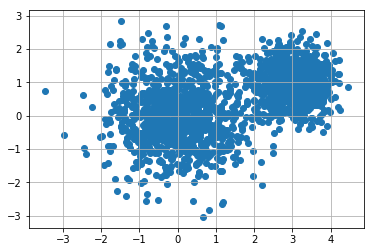

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X_data = np.load('data.npy')

plt.figure()
plt.scatter(X_data[:, 0], X_data[:, 1])
#plt.scatter(mu[0][0], mu[0][1], color='red')
#plt.scatter(mu[1][0], mu[1][1], color='red')
plt.grid()
plt.show()

In [3]:
X_data

array([[ 2.70441288,  0.59184667],
       [ 0.28972982,  0.52104583],
       [ 1.14964462,  0.00575976],
       ...,
       [ 0.42550225, -0.23875095],
       [ 2.62427368,  2.12269424],
       [-0.46062387, -0.3939605 ]])

## 2. K-means

#### Assume that k=2

In [4]:
k = 2

#### Step1 ) Take initial center

1. randomly (SKIP)

In [5]:
index = np.random.randint(0, len(X_data), size=k)
mu = X_data[index]

2. fixed

In [6]:
mu = np.array([[-1,1], [0,-1]])

#### Step2 ) Clustering

In [7]:
a = np.sqrt(np.sum((X_data - mu[0])**2, axis=1)).reshape(-1,1)
b = np.sqrt(np.sum((X_data - mu[1])**2, axis=1)).reshape(-1,1)
dist = np.vstack([a.T, b.T])
dist

array([[3.72683028, 1.37579072, 2.36843527, ..., 1.88853397, 3.79418002,
        1.49467471],
       [3.13812441, 1.54839393, 1.52749319, ..., 0.87209649, 4.07897434,
        0.76122153]])

In [8]:
cluster = np.argmin(dist, axis=0)

#### Step3 ) Find new center

In [9]:
mu = []
for l in range(k):
    mu.append(np.average(X_data[cluster==l], axis=0))

#### Check : Is J properly decreasing?

In [10]:
J = np.sum((np.min(dist, axis=0))**2)
print(J)

14703.940944081667


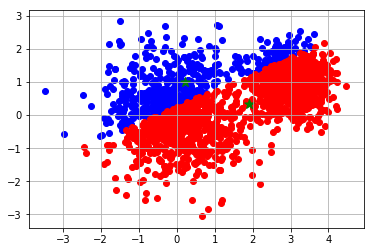

In [11]:
plt.figure()
plt.scatter(X_data[cluster==0][:,0], X_data[cluster==0][:,1], c='b')
plt.scatter(X_data[cluster==1][:,0], X_data[cluster==1][:,1], c='r')
plt.scatter(mu[0][0],mu[0][1], color ='green', marker="*", s=100 )
plt.scatter(mu[1][0],mu[1][1], color ='green', marker="*", s=100 )
plt.grid()
plt.show()

## Exercise : Assume that the number of clustering k=2 and iterations =10